# RADON TRANSFORM IN 2D


Radon transform on disk

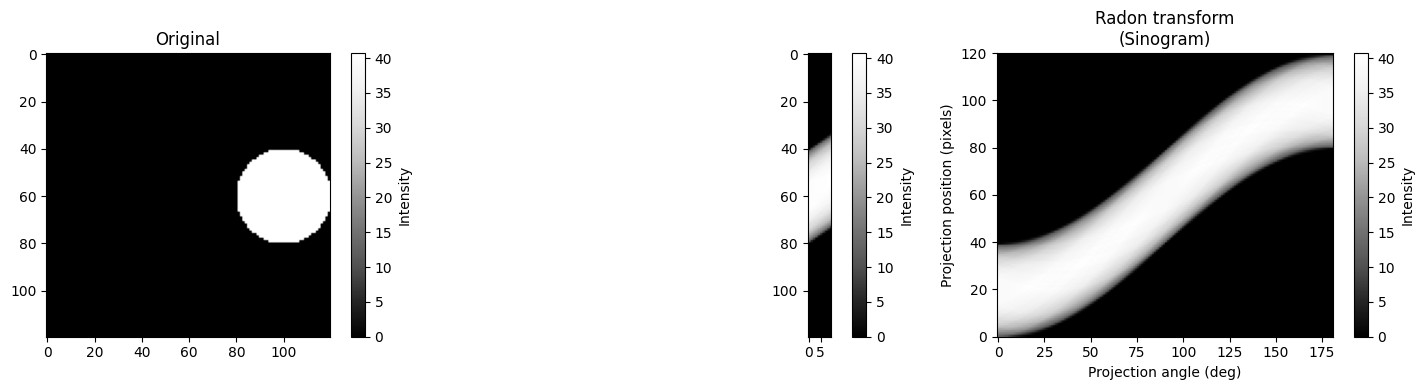

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from data_generator import DataGenerator
from radon_transform import radon, padding_radon
# Parameters for disk
size = (120, 120)  
radius = 20
center = (100, 60)

# Generate Disk 
disk = DataGenerator.generate_disk(size, radius, center)

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.set_title("Original")
ax1.imshow(disk, cmap=plt.cm.Greys_r)

# Generate a sinogram
center_disk, padded_disk =  padding_radon(disk)
theta = np.arange(0,180)
sinogram = radon(center_disk, padded_disk, theta=theta)
dx, dy = 0.5 * 180.0 / max(disk.shape), 0.5 / sinogram.shape[0] # spacing

# Slice of sinogram according to projection angle
first_projection_angle = 90
last_projection_angle = 100
cax = ax2.imshow(sinogram[:, first_projection_angle:last_projection_angle], cmap=plt.cm.Greys_r)
# Whole sinogra
cax = ax3.imshow(sinogram, cmap=plt.cm.Greys_r,
                 extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
                 aspect='auto')
# Add color bar
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection angle (deg)")
ax3.set_ylabel("Projection position (pixels)")
cbar = plt.colorbar(cax, ax=ax1)
cbar.set_label('Intensity')
cbar1 = plt.colorbar(cax, ax=ax2)
cbar1.set_label('Intensity')
cbar2 = plt.colorbar(cax, ax=ax3)
cbar2.set_label('Intensity')
fig.tight_layout()
plt.show()


Radon transform on Shepp Logan

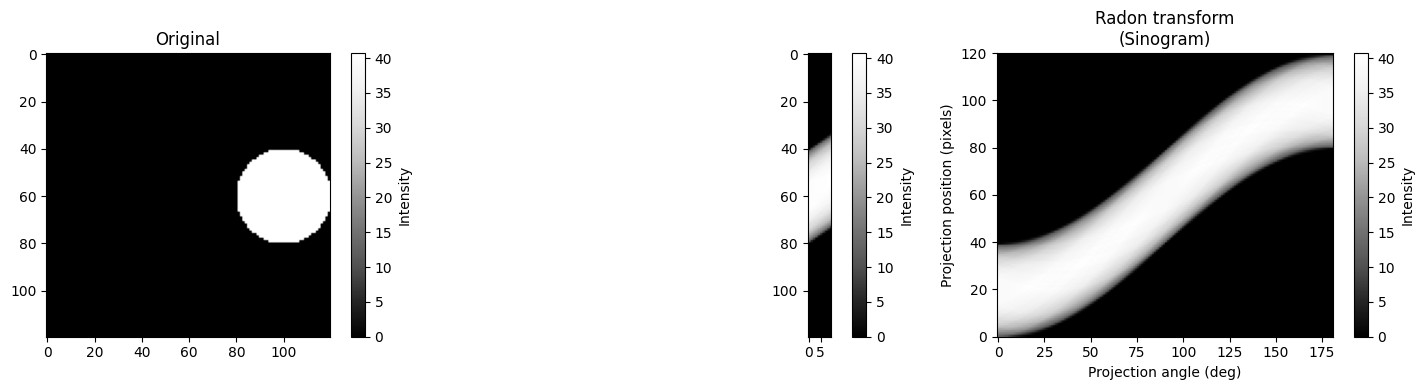

In [2]:
# Generate Phantom 
phantom = DataGenerator.generate_disk(size, radius, center)
# phantom = DataGenerator.load_shepp_logan_phantom()
# phantom = DataGenerator.load_image('data/brain.png')
# Plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.set_title("Original")
ax1.imshow(phantom, cmap=plt.cm.Greys_r)

# Generate a sinogram
center_phantom, padded_phantom =  padding_radon(phantom)
sinogram = radon(center_phantom, padded_phantom, theta=np.arange(0,180))
dx, dy = 0.5 * 180.0 / max(phantom.shape), 0.5 / sinogram.shape[0] # spacing

# Slice of sinogram according to angle
first_angle_slice = 90
last_angle_slice = 100
cax = ax2.imshow(sinogram[:, first_angle_slice:last_angle_slice], cmap=plt.cm.Greys_r)
# Whole sinogram
cax = ax3.imshow(sinogram, cmap=plt.cm.Greys_r,
                 extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
                 aspect='auto')
# Add color bar
ax3.set_title("Radon transform\n(Sinogram)")
ax3.set_xlabel("Projection angle (deg)")
ax3.set_ylabel("Projection position (pixels)")
cbar = plt.colorbar(cax, ax=ax1)
cbar.set_label('Intensity')
cbar1 = plt.colorbar(cax, ax=ax2)
cbar1.set_label('Intensity')
cbar2 = plt.colorbar(cax, ax=ax3)
cbar2.set_label('Intensity')
fig.tight_layout()
plt.show()

## Fourier Gridding Method

Fourier Slice Theorem

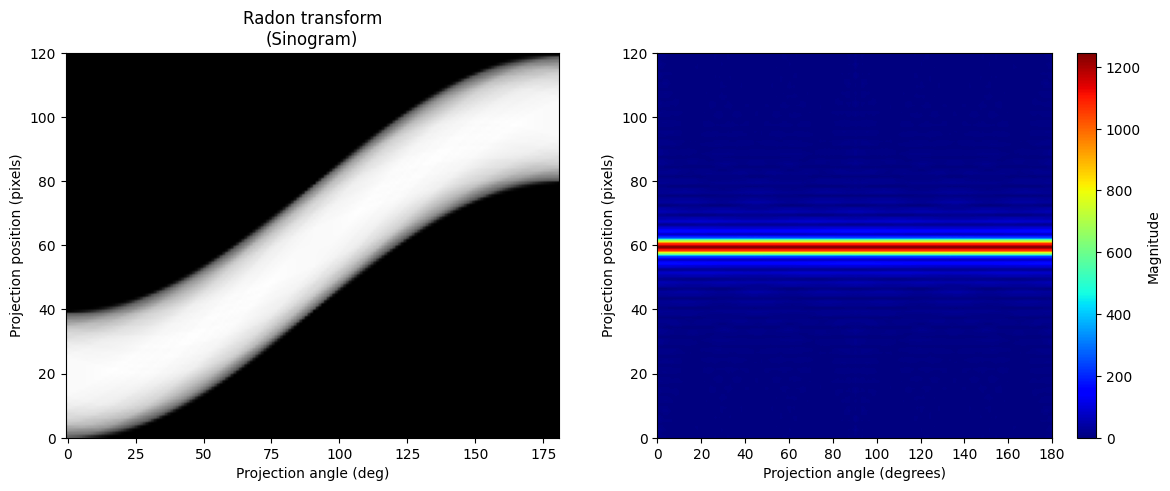

In [3]:
from fourier_transform import FT_1D
# Perform 1D Fourier transform on sinogram for each projection angle
N, proj_fft = FT_1D(sinogram) # N is length of FFT
# Display Radon transform 
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(14, 5))
ax1.imshow(sinogram, cmap=plt.cm.Greys_r,
                 extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
                 aspect='auto')
ax1.set_title("Radon transform\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")

# Display the Fourier projections
ax2.set_xlabel("Projection angle (degrees)")
ax2.set_ylabel("Projection position (pixels)")
img2 = ax2.imshow(np.abs(proj_fft), cmap='jet', aspect='auto', extent=(0, 180, 0, proj_fft.shape[0]))
cbar = plt.colorbar(img2, ax=ax2)
cbar.set_label('Magnitude')
plt.show()

Fourier slice Theorem

In [4]:
from fourier_gridding import create_radial_grid,create_cartesian_grid
# Create Radial Grid:
theta_grid, r_grid = create_radial_grid(N,theta)

#  create the cartesian grid 
omega_grid_x, omega_grid_y = create_cartesian_grid(N)


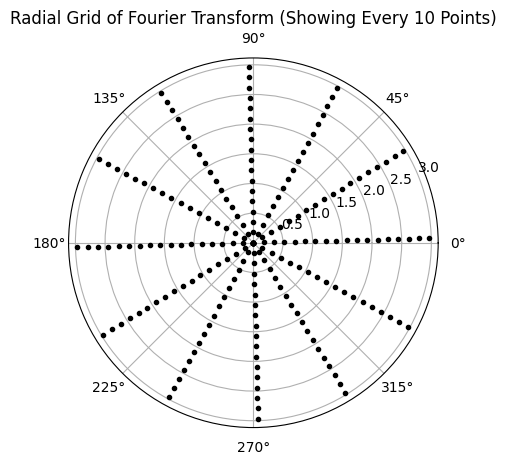

In [5]:
# Plot the Radial grid
display_interval=10
# Visualization of Radial Grid with every skip points
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(r_grid[::display_interval, ::display_interval], theta_grid[::display_interval, ::display_interval], 'k.')
ax.set_title(f'Radial Grid of Fourier Transform (Showing Every {display_interval} Points)')
ax.grid(True)
plt.show()


We want to interpolate to the Cartesian Coordinate

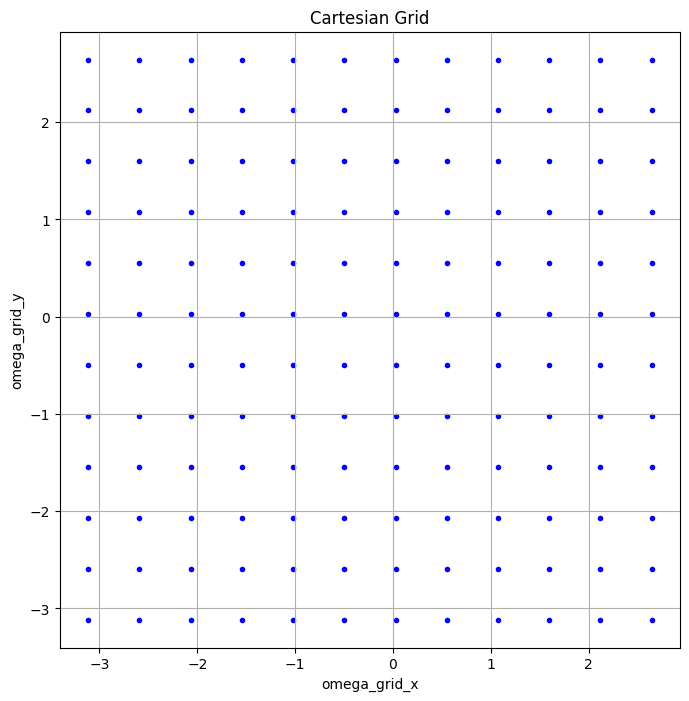

In [6]:
# Plot the Cartesian grid
plt.figure(figsize=(8, 8))
plt.scatter(omega_grid_x[::display_interval, ::display_interval], omega_grid_y[::display_interval, ::display_interval], marker='.', color='b')
plt.title('Cartesian Grid')
plt.xlabel('omega_grid_x')
plt.ylabel('omega_grid_y')
plt.grid(True)
plt.show()


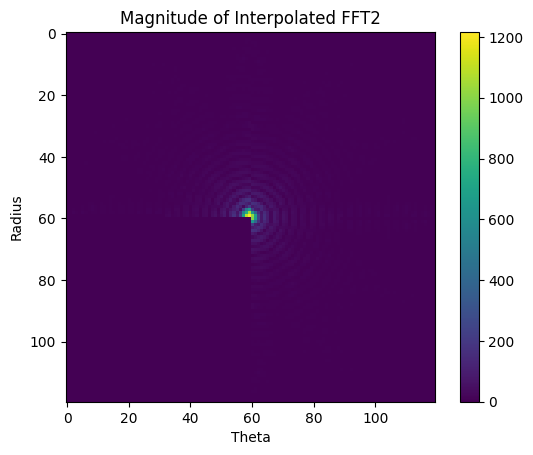

In [7]:
from fourier_gridding import radial_to_cartesian_inperpolation
FFT2 = radial_to_cartesian_inperpolation(omega_grid_x, omega_grid_y, r_grid, theta_grid, proj_fft)
plt.imshow(np.abs(FFT2))
plt.colorbar()
plt.title('Magnitude of Interpolated FFT2')
plt.xlabel('Theta')
plt.ylabel('Radius')
plt.show()

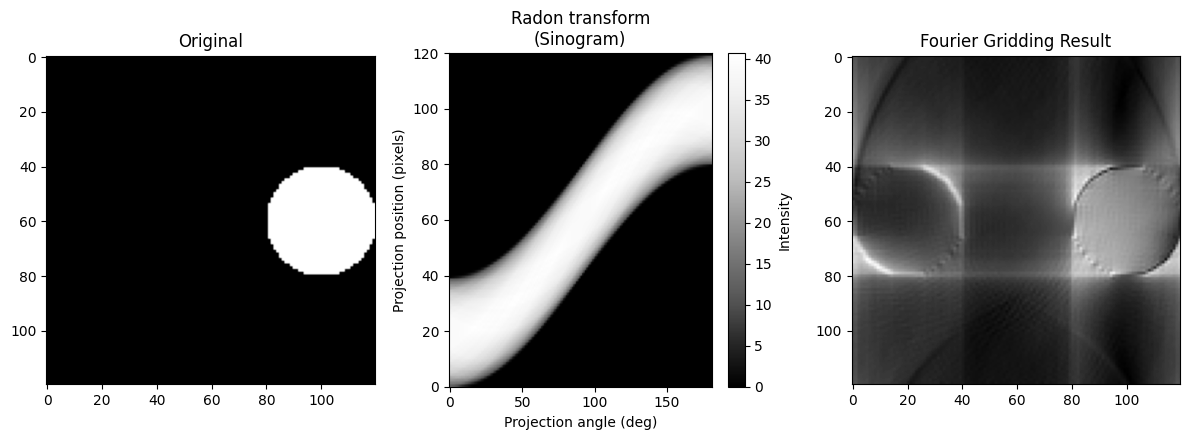

In [8]:
from fourier_gridding import inverse_2D_FT

# Perform the inverse operations
I = inverse_2D_FT(FFT2)

# Original Image
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4.5))

ax1.set_title("Original")
ax1.imshow(phantom, cmap=plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
cax = ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
                 extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
                 aspect='auto')

# Add color bar
cbar2 = plt.colorbar(cax, ax=ax2)
cbar2.set_label('Intensity')

# Fourier Gridding  Result
ax3.set_title('Fourier Gridding Result')
ax3.imshow(np.abs(I), cmap='gray')

fig.tight_layout()
plt.show()

## Backprojection

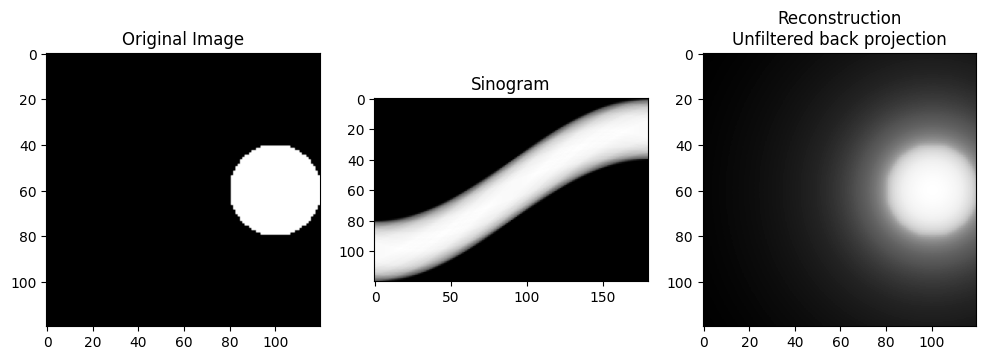

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import iradon
from scipy.fft import fft2, fftshift
from backprojection import backprojection
# Assuming 'sinogram' is your input sinogram and 'theta' is the array of projection angles
# Make sure 'theta' is in degrees

# Perform filtered backprojection reconstruction
_, reconstruction_bp = backprojection(sinogram, theta=theta,filter = None, output_size=phantom.shape[0])


# Display the original image, reconstruction, and Fourier Transform
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.set_title("Original Image")
ax1.imshow(phantom, cmap=plt.cm.Greys_r)

ax2.set_title("Sinogram")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r)

ax3.set_title("Reconstruction\nUnfiltered back projection")
ax3.imshow(np.abs(reconstruction_bp), cmap=plt.cm.Greys_r)

plt.show()


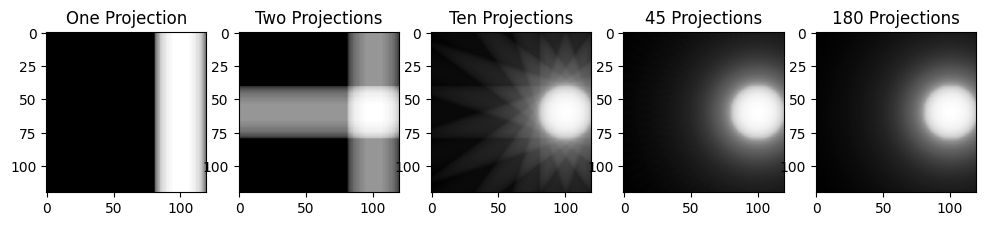

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import iradon
from scipy.fft import fft2, fftshift
from backprojection import backprojection
# Assuming 'sinogram' is your input sinogram and 'theta' is the array of projection angles
# Make sure 'theta' is in degrees

# Perform filtered backprojection reconstruction
_,reconstruction_bp_1_angle = backprojection(sinogram, theta=theta, filter=None, output_size=phantom.shape[0], interval =180)
_,reconstruction_bp_2_angle = backprojection(sinogram, theta=theta, filter=None,output_size=phantom.shape[0], interval =90)
_,reconstruction_bp_10_angle = backprojection(sinogram, theta=theta, filter=None,output_size=phantom.shape[0], interval =18)
_,reconstruction_bp_45_angle = backprojection(sinogram, theta=theta, filter=None,output_size=phantom.shape[0], interval =4)


# Display the original image, reconstruction, and Fourier Transform
fig, (ax1, ax2, ax3,ax4, ax5) = plt.subplots(1, 5, figsize=(12, 4))
ax1.set_title("One Projection")
ax1.imshow(reconstruction_bp_1_angle, cmap=plt.cm.Greys_r)

ax2.set_title("Two Projections")
ax2.imshow(reconstruction_bp_2_angle, cmap=plt.cm.Greys_r)

ax3.set_title("Ten Projections")
ax3.imshow(reconstruction_bp_10_angle, cmap=plt.cm.Greys_r)

ax4.set_title("45 Projections")
ax4.imshow(reconstruction_bp_45_angle, cmap=plt.cm.Greys_r)

ax5.set_title("180 Projections")
ax5.imshow(reconstruction_bp, cmap=plt.cm.Greys_r)
plt.show()

## BACKPROJECT FILTER


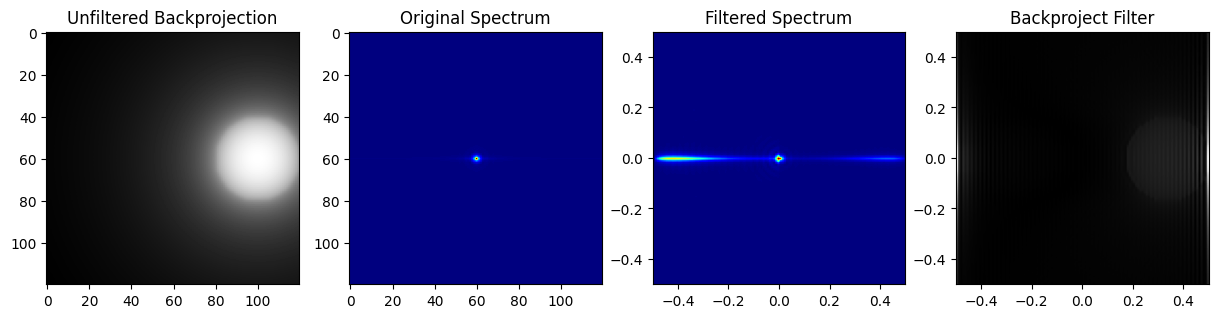

In [11]:
from filters import cone_filter
# Perform 2D Fourier Transform
reconstruction_ft = fftshift(fft2(reconstruction_bp))
# Define the frequency coordinates
u = np.fft.fftfreq(reconstruction_ft.shape[1])
v = np.fft.fftfreq(reconstruction_ft.shape[0])

# Apply cone filter to the 2D Fourier transform
modified_spectrum, filtered_image = cone_filter(reconstruction_ft, u, v)

# Display the original sinogram, the reconstructed image, and the filtered image
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(reconstruction_bp, cmap='gray')
plt.title('Unfiltered Backprojection')

plt.subplot(1, 4, 2)
plt.imshow(np.abs(reconstruction_ft), cmap='jet')
plt.title('Original Spectrum')

plt.subplot(1, 4, 3)
plt.imshow(np.abs(modified_spectrum), cmap='jet', extent=[-0.5, 0.5, -0.5, 0.5])  # Displaying the central region of the spectrum
plt.title('Filtered Spectrum')


plt.subplot(1, 4, 4)
plt.imshow(np.abs(filtered_image), cmap='gray', extent=[-0.5, 0.5, -0.5, 0.5])  # Displaying the central region of the spectrum
plt.title('Backproject Filter')
plt.show()


## Filtered Back Projection

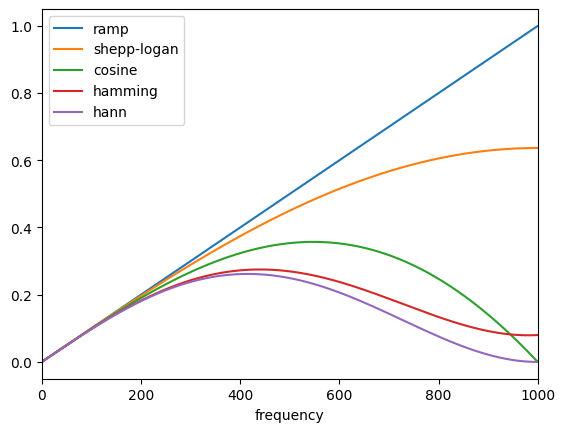

In [12]:
from backprojection import _get_fourier_filter
filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

for ix, f in enumerate(filters):
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f)

plt.xlim([0, 1000])
plt.xlabel('frequency')
plt.legend()
plt.show()

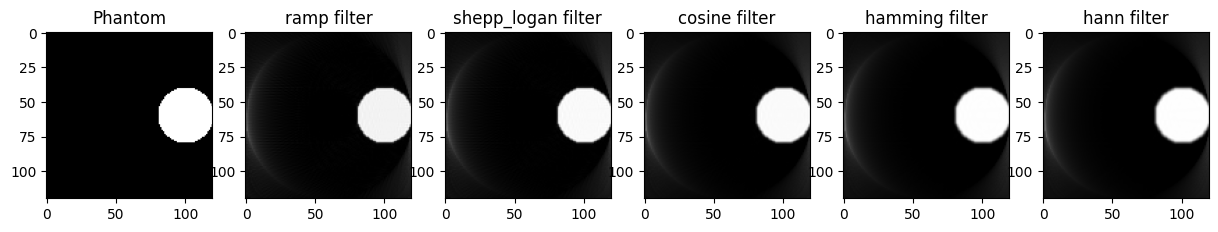

In [13]:
# Perform filtered backprojection reconstruction
_,reconstruction_fbp_ramp = backprojection(sinogram, theta=theta,filter = 'ramp', output_size=phantom.shape[0])
sinogram_filtered_shepp_logan,reconstruction_fbp_shepp_logan= backprojection(sinogram, theta=theta,filter = 'shepp-logan', output_size=phantom.shape[0])
_,reconstruction_fbp_cosine= backprojection(sinogram, theta=theta,filter = 'cosine', output_size=phantom.shape[0])
_,reconstruction_fbp_hamming= backprojection(sinogram, theta=theta,filter = 'hamming', output_size=phantom.shape[0])
_,reconstruction_fbp_hann= backprojection(sinogram, theta=theta,filter = 'hann', output_size=phantom.shape[0])

# Display the original sinogram, the reconstructed image, and the filtered image
plt.figure(figsize=(15, 5))

plt.subplot(1, 6, 1)
plt.imshow(phantom, cmap='gray')
plt.title('Phantom')

plt.subplot(1, 6, 2)
plt.imshow(np.abs(reconstruction_fbp_ramp), cmap='gray')
plt.title('ramp filter')

plt.subplot(1, 6, 3)
plt.imshow(np.abs(reconstruction_fbp_shepp_logan), cmap='gray')
plt.title('shepp_logan filter')

plt.subplot(1, 6, 4)
plt.imshow(np.abs(reconstruction_fbp_cosine), cmap='gray')  # Displaying the central region of the spectrum
plt.title('cosine filter')


plt.subplot(1, 6, 5)
plt.imshow(np.abs(reconstruction_fbp_hamming), cmap='gray')  # Displaying the central region of the spectrum
plt.title('hamming filter')

plt.subplot(1, 6, 6)
plt.imshow(np.abs(reconstruction_fbp_hann), cmap='gray')  # Displaying the central region of the spectrum
plt.title('hann filter')
plt.show()


Text(0.5, 1.0, 'Reconstruction')

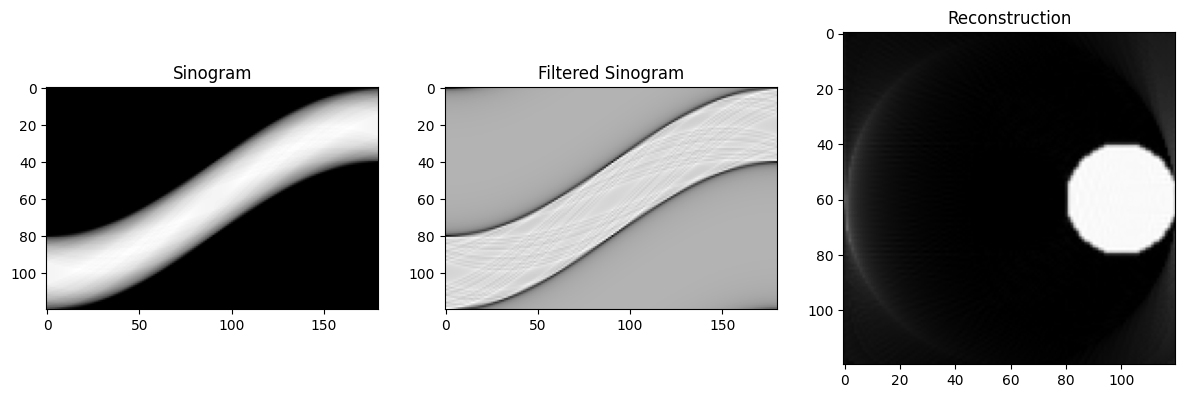

In [14]:
# Display the original sinogram, the reconstructed image, and the filtered image
plt.figure(figsize=(30, 5))

plt.subplot(1, 6, 1)
plt.imshow(sinogram, cmap='gray')
plt.title('Sinogram')

plt.subplot(1, 6, 2)
plt.imshow(sinogram_filtered_shepp_logan, cmap='gray')
plt.title('Filtered Sinogram')

plt.subplot(1, 6, 3)
plt.imshow(np.abs(reconstruction_fbp_shepp_logan), cmap='gray')
plt.title('Reconstruction')

## Convolve Backproject

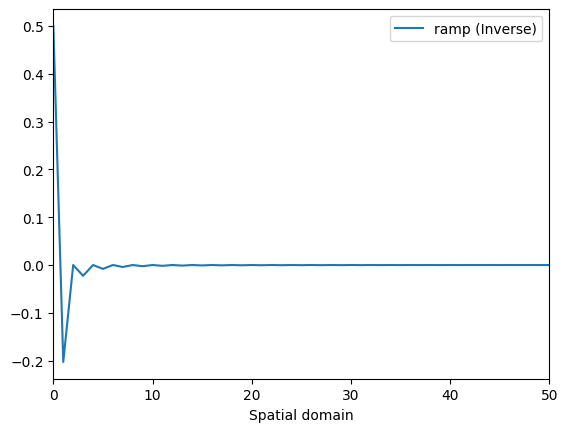

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import ifft, fftfreq
from backprojection import _get_fourier_filter

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']


# Generate Fourier filter
response = _get_fourier_filter(sinogram.shape[0], filters[0])
    
# Inverse Fourier transform to get the filter in spatial domain
inverse_filter = ifft(response.flatten()).real
    
# Plot the inverse filter
plt.plot(inverse_filter, label=filters[0] + ' (Inverse)')

plt.xlim([0, 50])
plt.xlabel('Spatial domain')
plt.legend()
plt.show()


Text(0.5, 1.0, 'CBP Reconstruction')

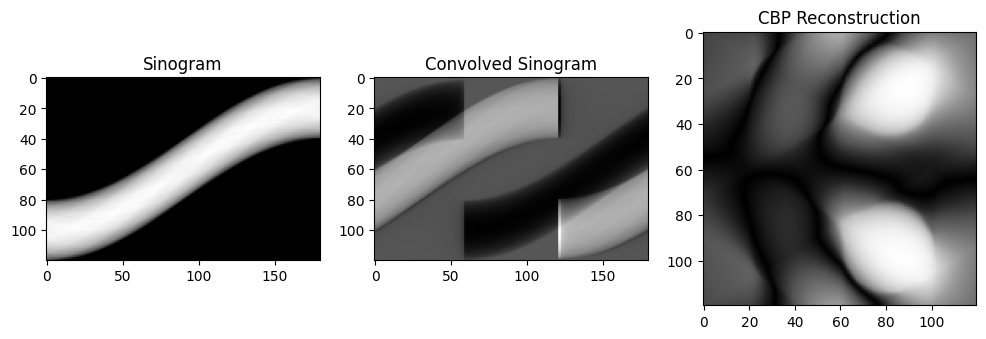

In [35]:
import numpy as np
from numpy.fft import ifft, ifftshift


def _get_inverse_fourier_filter(size, filter_name):
    # Use the _get_fourier_filter function to get the original filter
    fourier_filter = _get_fourier_filter(size, filter_name)
    
    # Get the frequencies corresponding to each element in the filter
    freq = fftfreq(size)
    
    # Invert the filter in the frequency domain (performing the inverse Fourier transform)
    inverse_filter = ifftshift(np.fft.ifft(fourier_filter.flatten())).real
    
    return inverse_filter[:, np.newaxis]


# Assuming img_shape and sinogram are defined

# Specify the filter name (e.g., 'ramp', 'shepp-logan', 'cosine', 'hamming', 'hann')
filter_name = 'cosine'

# Get the inverse Fourier filter
inverse_fourier_filter = _get_inverse_fourier_filter(sinogram.shape[0], filter_name)

# Convolve sinogram with the inverse Fourier filter in the spatial domain
convolved_sinogram = np.convolve(sinogram.flatten(), inverse_fourier_filter.flatten(), mode='same')
convolved_sinogram = np.reshape(convolved_sinogram, sinogram.shape)
# convolved_sinogram = np.concatenate((convolved_sinogram[:, 56:], convolved_sinogram[:, :56]), axis=1)
# Perform filtered backprojection reconstruction
_, reconstruction_cbp = backprojection(convolved_sinogram, theta=theta,filter = None, output_size=phantom.shape[0])

# Display the original sinogram, the reconstructed image, and the filtered image
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(sinogram, cmap='gray')
plt.title('Sinogram')

plt.subplot(1, 3, 2)
plt.imshow(convolved_sinogram, cmap='gray')
plt.title('Convolved Sinogram')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(reconstruction_cbp), cmap=plt.cm.Greys_r)
plt.title('CBP Reconstruction')
